In [5]:
import os
import urllib.request
import ssl

In [6]:
ssl._create_default_https_context = ssl._create_unverified_context

In [7]:
os.mkdir('img_align_celeba')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'img_align_celeba'

In [9]:
for i in range(1,11):
    f = '000%03d.jpg' %i
    url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f
    print(url, end='\r')
    urllib.request.urlretrieve(url, os.path.join('img_align_celeba', f))

In [11]:
files=os.listdir('img_align_celeba')

In [12]:
print(files)

['000001.jpg', '000002.jpg', '000003.jpg', '000004.jpg', '000005.jpg', '000006.jpg', '000007.jpg', '000008.jpg', '000009.jpg', '000010.jpg']


In [13]:
[file_i for file_i in os.listdir('img_align_celeba') if '.jpg' in file_i]

['000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000007.jpg',
 '000008.jpg',
 '000009.jpg',
 '000010.jpg']

In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
%matplotlib inline

In [23]:
#help(plt)

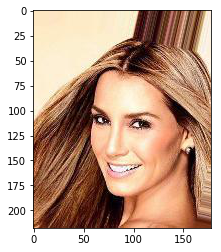

In [31]:

img=plt.imread(os.path.join('img_align_celeba', files[0]))
plt.imshow(img)

In [32]:
img.shape

(218, 178, 3)

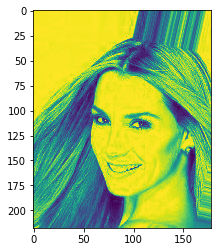

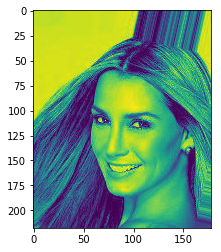

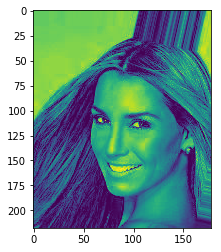

In [40]:
plt.figure()
plt.imshow(img[:, :, 0])
plt.figure()
plt.imshow(img[:, :, 1])
plt.figure()
plt.imshow(img[:, :, 2])

In [41]:
np.min(img), np.max(img)

(0, 255)

In [42]:
img.dtype

dtype('uint8')

In [43]:
img.astype(np.float32)


array([[[253., 231., 194.],
        [253., 231., 194.],
        [253., 231., 194.],
        ...,
        [247., 226., 225.],
        [254., 238., 222.],
        [254., 238., 222.]],

       [[253., 231., 194.],
        [253., 231., 194.],
        [253., 231., 194.],
        ...,
        [249., 228., 225.],
        [254., 238., 222.],
        [254., 238., 222.]],

       [[253., 231., 194.],
        [253., 231., 194.],
        [253., 231., 194.],
        ...,
        [250., 231., 227.],
        [255., 239., 223.],
        [255., 239., 223.]],

       ...,

       [[140.,  74.,  26.],
        [116.,  48.,   1.],
        [146.,  78.,  33.],
        ...,
        [122.,  55.,  28.],
        [122.,  56.,  30.],
        [122.,  56.,  30.]],

       [[130.,  62.,  15.],
        [138.,  70.,  23.],
        [166.,  98.,  53.],
        ...,
        [118.,  49.,  20.],
        [118.,  51.,  24.],
        [118.,  51.,  24.]],

       [[168., 100.,  53.],
        [204., 136.,  89.],
        [245., 1

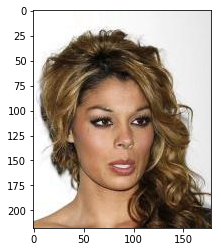

In [47]:
files = [os.path.join('img_align_celeba', file_i) for file_i in os.listdir('img_align_celeba') if '.jpg' in file_i]
filename = files[np.random.randint(0, len(files))]
img = plt.imread( filename)
plt.imshow(img)

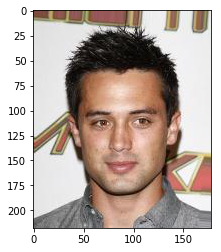

In [51]:
img = plt.imread(files[6])
plt.imshow(img)

In [52]:
def plot_image(filename):
    img = plt.imread(filename)
    plt.imshow(img)

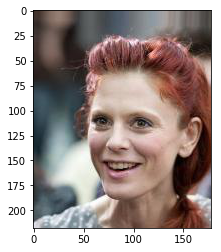

In [54]:
plot_image(files[1])

In [72]:
def imcrop_tosquare(img):
   
    """Make any image a square image.

    Parameters
    ---------
    img : np.ndarray
        Input image to crop, assumed at least 2d.

    Returns
    -------
    crop : np.ndarray
        Cropped image.
    """
    if img.shape[0] > img.shape[1]:
        extra = (img.shape[0] - img.shape[1])
        if extra % 2 == 0:
            crop = img[extra // 2:-extra // 2, :]
        else:
            crop = img[max(0, extra // 2 + 1):min(-1, -(extra // 2)), :]
    elif img.shape[1] > img.shape[0]:
        extra = (img.shape[1] - img.shape[0])
        if extra % 2 == 0:
            crop = img[:, extra // 2:-extra // 2]
        else:
            crop = img[:, max(0, extra // 2 + 1):min(-1, -(extra // 2))]
    else:
        crop = img
    return crop

(178, 178, 3)

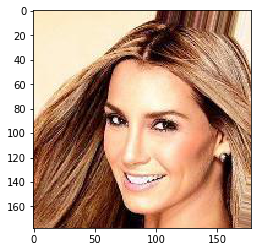

In [100]:
img=imcrop_tosquare(plt.imread(files[0]))
plt.imshow(img)
img.shape

In [74]:
def imcrop(img, amt):
    if amt <= 0 or amt >= 1:
        return img
    row_i = int(img.shape[0] * amt) // 2
    col_i = int(img.shape[1] * amt) // 2
    return img[row_i:-row_i, col_i:-col_i]

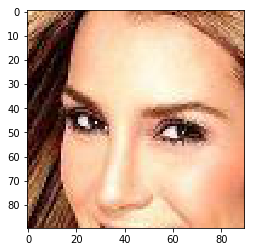

In [75]:
plt.imshow(imcrop(img,0.5))

In [76]:
imcrop(img,0.5).shape

(90, 90, 3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  after removing the cwd from sys.path.


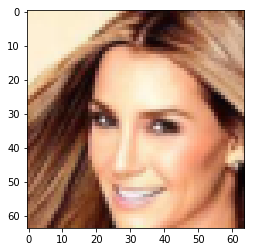

In [82]:
from scipy.misc import imresize
square = imcrop_tosquare(img)
crop = imcrop(square, 0.2)
rsz = imresize(crop, (64, 64))
plt.imshow(rsz)

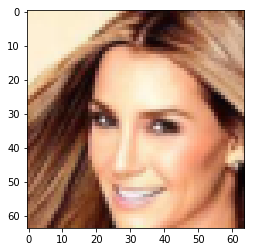

In [83]:
plt.imshow(rsz, interpolation='nearest')

(64, 64)


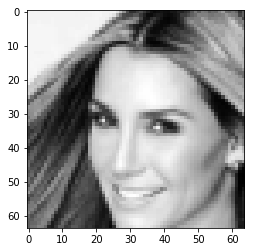

In [88]:
mean_img = np.mean(rsz, axis=2)
print(mean_img.shape)
plt.imshow(mean_img,cmap='gray')

In [89]:
imgs = []
for file_i in files:
    img = plt.imread(file_i)
    square = imcrop_tosquare(img)
    crop = imcrop(square, 0.2)
    rsz = imresize(crop, (64, 64))
    imgs.append(rsz)
print(imgs)

[array([[[251, 238, 205],
        [251, 238, 206],
        [253, 240, 207],
        ...,
        [139,  91,  65],
        [ 98,  46,  22],
        [134,  86,  53]],

       [[252, 239, 207],
        [252, 239, 207],
        [253, 240, 208],
        ...,
        [158, 112,  87],
        [111,  61,  39],
        [137,  89,  57]],

       [[252, 239, 209],
        [252, 239, 209],
        [252, 239, 209],
        ...,
        [162, 121,  95],
        [158, 113,  90],
        [114,  68,  40]],

       ...,

       [[141,  86,  56],
        [138,  83,  55],
        [155, 101,  75],
        ...,
        [100,  43,  26],
        [ 63,  21,  19],
        [ 71,  33,  32]],

       [[141,  79,  54],
        [149,  90,  63],
        [149,  93,  65],
        ...,
        [115,  52,  33],
        [ 57,  21,  15],
        [ 51,  22,  17]],

       [[142,  82,  54],
        [161, 100,  68],
        [165, 104,  68],
        ...,
        [118,  53,  32],
        [ 53,  15,   8],
        [ 52,  21,  14]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


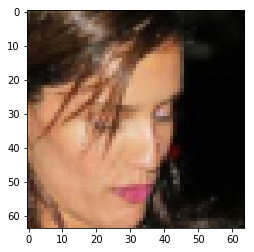

In [103]:
plt.imshow(imgs[3])

In [104]:
imgs[0].shape

(64, 64, 3)

In [105]:
data=np.array(imgs)
data.shape

(10, 64, 64, 3)